<a href="https://colab.research.google.com/github/Hit07/ML-DL-Torch/blob/main/FoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOM DATASET

> Our dataset is a subset of the Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class (750
training, 250 testing)

> Our dataset starts with 3 classes of food and only 10% of the images (75 training,
25 testing)

> Why do this?
When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.
The whole point is to speed up how fast you can experiment.

# Import Statements

In [1]:
import torch
from torch import nn
from pathlib import Path
import requests
import zipfile
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
# Transform image
from torchvision import datasets,transforms



# Downloading the datasets

In [2]:
data_path = Path("data/")
images_path = data_path / 'pizza_steak_sushi'

if images_path.is_dir():
  print(f'{images_path} directory already exists, skipping download')
else:
  print(f"{images_path} directory doesn't exist")
  images_path.mkdir(parents=True,exist_ok=True)

  with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    request.raise_for_status
    print("Downlaoding the zip file")
    f.write(request.content)

  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_f:
    print("Extracting zipfile")
    zip_f.extractall(images_path)


data/pizza_steak_sushi directory doesn't exist
Downlaoding the zip file
Extracting zipfile


In [3]:
# Data Exploration and Data Cleaning

def walk_through_dir(dir_path):
  ''' Walks through the dir_path and returns the content'''
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} and {len(filenames)} images in {dirpath}')

walk_through_dir(images_path)

There are 2 and 0 images in data/pizza_steak_sushi
There are 3 and 0 images in data/pizza_steak_sushi/train
There are 0 and 75 images in data/pizza_steak_sushi/train/steak
There are 0 and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 and 0 images in data/pizza_steak_sushi/test
There are 0 and 19 images in data/pizza_steak_sushi/test/steak
There are 0 and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 and 25 images in data/pizza_steak_sushi/test/pizza


In [4]:
train_dir = images_path / 'train'
test_dir = images_path / 'test'

train_dir,test_dir



(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing and image
1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

In [6]:
torch.manual_seed(42)
images_list  = list(images_path.glob('*/*/*.jpg'))
random_image_path = random.choice(images_list)
random_image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f'Image Path: {random_image_path}\nImage class: {random_image_class}\nImage height: { img.height}\nImage width: { img.width}\n')

Image Path: data/pizza_steak_sushi/train/steak/2129685.jpg
Image class: steak
Image height: 512
Image width: 512



(-0.5, 511.5, 511.5, -0.5)

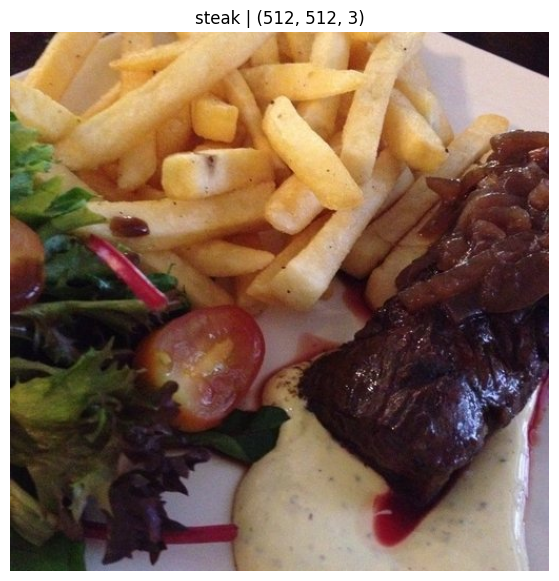

In [7]:
# Visualize the Data
image_as_np = np.array(img)
plt.figure(figsize=(10,7))
plt.imshow(image_as_np)
plt.title(f'{random_image_class} | {image_as_np.shape}')
plt.axis('off')

# Transfoming data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images ).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data`.
DataLoader, we'll call these `Dataset` and `Dataloader`

In [10]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64*64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizonatal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [16]:
data_transform(img).shape

torch.Size([3, 64, 64])

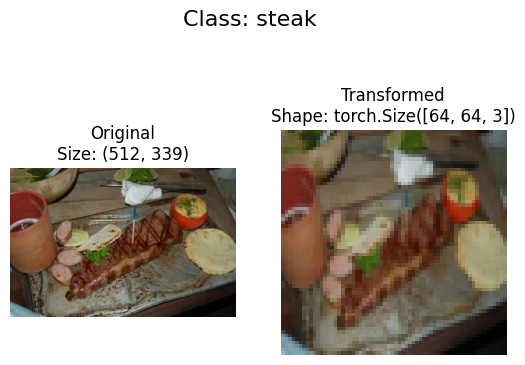

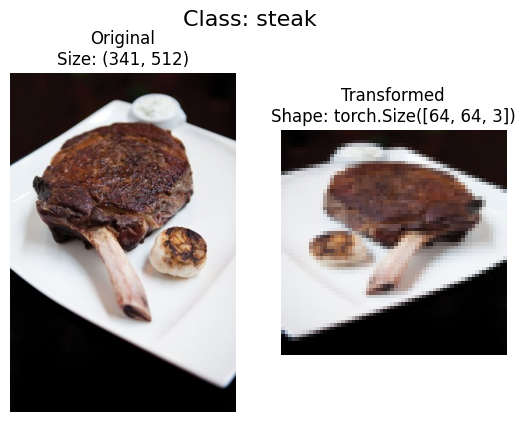

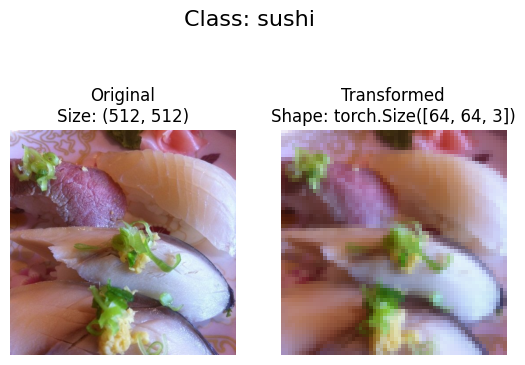

In [20]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  '''
  Selects random images from a path of images and load/transforms them to
  plots the original v/s transformed versions.
  '''
  if seed:
    random.seed (seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open (image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax [0].imshow (f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis (False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # Matplotlib takes in the for HWC
      ax[1].imshow (transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis ("off")
      fig.suptitle(f"Class: {image_path.parent.stem}" ,fontsize=16)


plot_transformed_images(images_list,data_transform,seed=42)

